# **What determines a student's performance?**
## by **Youssef Louhaichi**

## Investigation Overview

The purpose of this investigation is to examine student characteristics and identify those that can be used to predict their performance on three different types of subjects.
In this presentation I started by introducing the distribution of our variables of interest: students' scores, afterwards, I introduced each of the categorical variables that showed a direct strong effect on the students' performance along with the appropriate plot that best captured the nature of the relationship.

## Dataset Overview

The dataset used in this project can be found [here](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams), it contains some information about students including their secured marks in a variety of subjects.
- **gender**: The student's gender
- **race/ethnicity**: Race/Ethnicity of the student
- **parental level of education**: Level of education of the student's parents
- **lunch**: Indicates whether or not the student is having free or reduced lunch
- **test preparation**: Indicates whether or not the student has completed a test preparation course
- **math Score**: The student's math score
- **reading Score**: The student's reading score
- **writing Score**: The student's writing score

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\louha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('exams.csv')
categoric_vars = ['gender', 'race_ethnicity', 'parents_education', 'lunch', 'preparation_course']
numeric_vars = ['math_score', 'reading_score', 'writing_score']

# Rename column names
df = df.rename(columns={"race/ethnicity":"race_ethnicity",
                        "parental level of education":"parents_education",
                        "test preparation course":"preparation_course",
                        "math score":"math_score",
                        "reading score":"reading_score",
                        "writing score":"writing_score"})

# Convert categorical variables to category datatype
df.gender = df.gender.astype('category')
df.race_ethnicity = df.race_ethnicity.astype('category')
df.lunch = df.lunch.astype('category')
df.preparation_course = df.preparation_course.astype('category')

# Convert parents_education variable to ordred category datatype
education_lvls = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
df.parents_education = df.parents_education.astype(CategoricalDtype(education_lvls, ordered=True))

## Distributions and Pairwise Relationships of Scores

To look at the pairwise relationships and the distribution of scores, I used Seaborn's pairplot function, I chose a replot to look at pairwise relationships and a histplot as the kind of plot for the diagonal subplots in order to see the distribution of the score variables.  
The regplots show a strong linear relationship between each couple of score variables, This relationship seems to be more important between reading score and writing score that was seen through points that seemed to be more clustered around the line of best fit.  
The histplots show that the 3 scores have a slightly left-skewed distribution with some low scores and a peak between 60 and 80.  

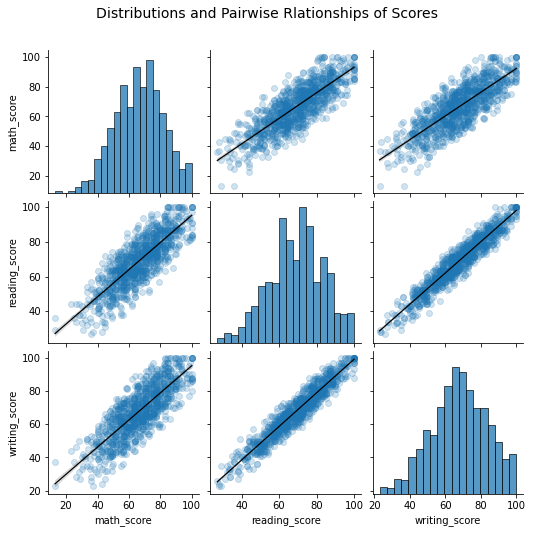

In [3]:
line_kws = {'color':'black', 'lw':1.2}
scatter_kws = {'alpha':0.2}
g = sb.pairplot(data=df, diag_kind='auto', kind='reg', plot_kws={'line_kws':line_kws,'scatter_kws':scatter_kws,})
# plt.title('Scores distributions and pairwise relationships')
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Distributions and Pairwise Rlationships of Scores', fontsize=14);


## Pairwise Scores Correlation

This chart supports the observations we’ve seen from the previous chart, except this time we can be more certain and precise about the correlation strength.

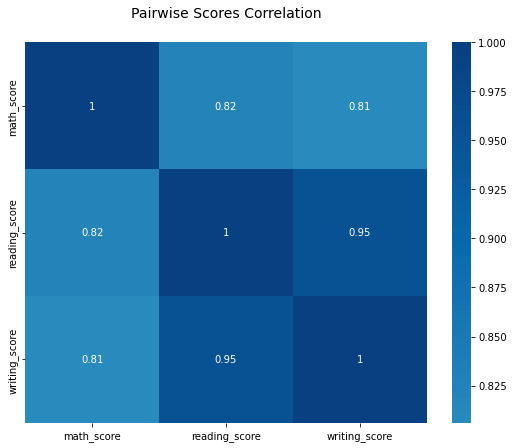

In [4]:
plt.figure(figsize=(9,7))
sb.heatmap(df.corr(), annot=True, cmap = 'GnBu', center=0.6,)
plt.title('Pairwise Scores Correlation', fontsize=14, y=1.05);

## Parental Level of Education vs Scores

Parental level of education is an ordered factor variable with the following levels: some high school, high school, some college, associate's degree, bachelor's degree, master's degree. Hence, the first thing I've done was convert this column type to a categorical variable in the right order. Then I created a figure and a grid of three subplots in order to look at the distribution of the three scores across the different educational levels. The result shows a linear positive correlation between the parental level of education and student performance in the three subjects.

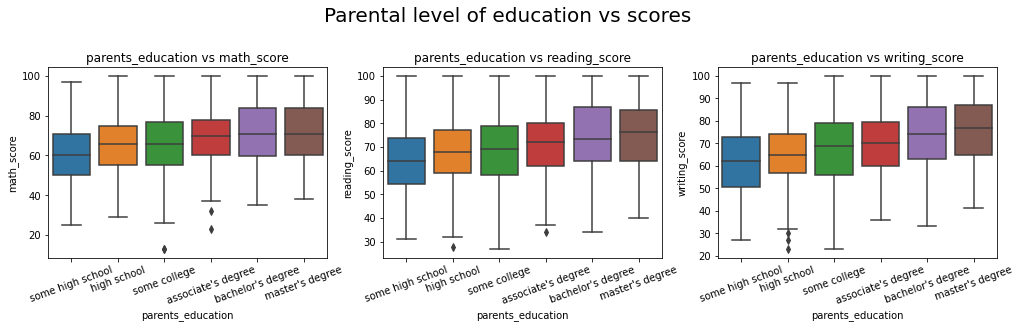

In [5]:
fig, ax = plt.subplots(1,3, figsize=(17,3.5), sharex=False)

for i, var in enumerate(numeric_vars):
    sb.boxplot(data=df, x='parents_education', y=var, ax=ax[i] )
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 20);
    ax[i].set_title('parents_education vs {}'.format(var))
    
fig.suptitle('Parental level of education vs scores', fontsize=20, y=1.12);

## Preparation Course vs Scores
By grouping the data with the preparation_course variable and computing the mean of the three scores, I was able to generate a bar chart showing that students who completed the preparation course outperformed those who didn't.

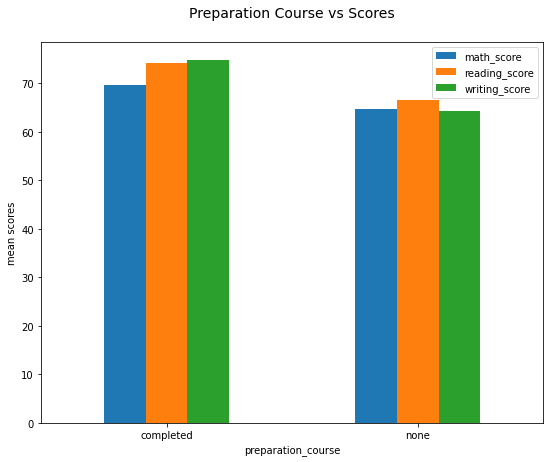

In [6]:
df.groupby('preparation_course').mean().plot(kind='bar', figsize=(9,7))
plt.ylabel('mean scores')
plt.xticks(rotation=0);
plt.title('Preparation Course vs Scores', fontsize=14, y=1.05);

## Gender vs Scores
Using the same technique and grouping by gender, I generated a bar chart, the chart shows that females performed better than males in reading and writing, whereas males performed better in mathematics.

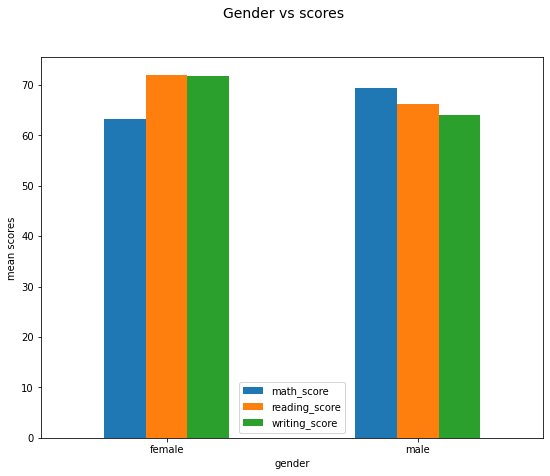

In [7]:
df.groupby('gender').mean().plot(kind='bar', figsize=(9,7))
plt.ylabel('mean scores')
plt.xticks(rotation=0);
plt.suptitle('Gender vs scores', fontsize=14);

## Lunch vs Scores
Students with standard lunch performed better than those with free or reduced lunch.

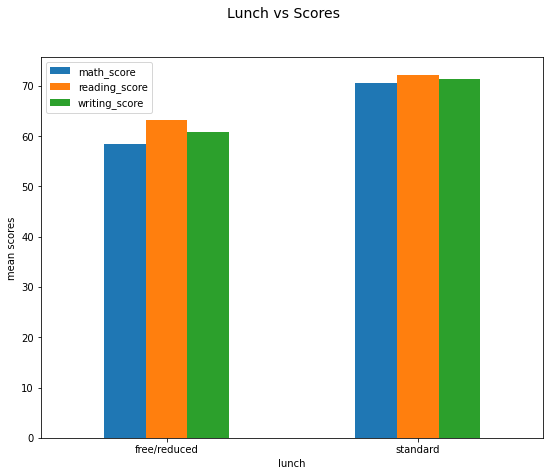

In [8]:
df.groupby('lunch').mean().plot(kind='bar', figsize=(9,7))
plt.ylabel('mean scores')
plt.xticks(rotation=0);
plt.suptitle('Lunch vs Scores', fontsize=14);

In [10]:
# !jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt